<a href="https://colab.research.google.com/github/RaziehAkbari2020/RecommendationSystems/blob/main/embedding_book_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book Recommendation System using Keras
A recommendation system seeks to predict the rating or preference a user would give to an item given his old item ratings or preferences. Recommendation systems are used by pretty much every major company in order to enhance the quality of their services.  
Content:  
1. [Loading in data](#1)  
2. [Creating dot product model](#2)
3. [Creating Neural Network](#3)
4. [Visualizing Embeddings](#4)
5. [Making Recommendations](#5)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model

warnings.filterwarnings('ignore')

<a id="1"></a>
## Loading in data

In [ ]:
dataset = pd.read_csv('/content/ratings.csv')

In [ ]:
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
dataset.shape

(981756, 3)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
train.head()

,book_id,user_id,rating
341848,3423,4608,2
964349,9811,36373,5
645459,6485,2957,4
74960,750,42400,3
358670,3591,36886,5


In [ ]:
test.head()

,book_id,user_id,rating
646451,6495,19643,5
614851,6175,8563,4
974393,9920,52110,3
21471,215,33864,5
272540,2728,16587,3


In [ ]:
n_users = len(dataset.user_id.unique())
n_users

53424

In [ ]:
n_books = len(dataset.book_id.unique())
n_books

10000

<a id="2"></a>
## Creating dot product model
Most recommendation systems are build using a simple dot product as shown below but newer ones are now implementing a neural network instead of the simple dot product.

In [ ]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

Epoch 1/5
24544/24544 [==============================] - 114s 5ms/step - loss: 15.4566
Epoch 2/5
24544/24544 [==============================] - 113s 5ms/step - loss: 7.3300
Epoch 3/5
24544/24544 [==============================] - 118s 5ms/step - loss: 2.3602
Epoch 4/5
24544/24544 [==============================] - 113s 5ms/step - loss: 1.3598
Epoch 5/5
24544/24544 [==============================] - 111s 5ms/step - loss: 1.0202


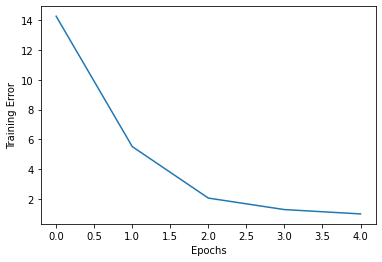

In [ ]:
from keras.models import load_model

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [ ]:
model.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 8s 1ms/step - loss: 1.2475


1.247514247894287

In [ ]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[4.879058] 5
[3.8002796] 4
[3.3962836] 3
[4.5500975] 5
[3.1773386] 3
[3.7013993] 3
[3.761106] 3
[4.7526226] 4
[4.065939] 3
[3.8760345] 5


[None, None, None, None, None, None, None, None, None, None]

<a id="3"></a>
## Creating Neural Network
Neural Networks proved there effectivness for almost every machine learning problem as of now and they also perform exceptionally well for recommendation systems.

In [ ]:
from keras.layers import Concatenate

# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

Epoch 1/5
24544/24544 [==============================] - 121s 5ms/step - loss: 1.0159
Epoch 2/5
24544/24544 [==============================] - 121s 5ms/step - loss: 0.6813
Epoch 3/5
24544/24544 [==============================] - 119s 5ms/step - loss: 0.6469
Epoch 4/5
24544/24544 [==============================] - 117s 5ms/step - loss: 0.6184
Epoch 5/5
24544/24544 [==============================] - 117s 5ms/step - loss: 0.6003


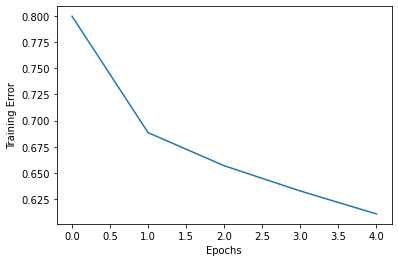

In [ ]:
from keras.models import load_model

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [ ]:
model2.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 9s 1ms/step - loss: 0.7096


0.7095974087715149

In [ ]:
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[4.9847846] 5
[3.794818] 4
[3.616138] 3
[4.2382607] 5
[3.4084964] 3
[3.8652577] 3
[3.8712249] 3
[4.984932] 4
[4.1178136] 3
[4.2207413] 5


[None, None, None, None, None, None, None, None, None, None]

<a id="4"></a>
## Visualizing Embeddings
Embeddings are weights that are learned to represent some specific variable like books and user in our case and therefore we can not only use them to get good results on our problem but also to extract inside about our data.

In [ ]:
# Extract embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [ ]:
book_em_weights[:5]

array([[ 0.02952043,  0.03178673,  0.01112623, -0.02141581,  0.03069324],
       [ 1.1716566 ,  1.3636379 ,  1.1269232 , -1.3639686 ,  0.3503914 ],
       [ 1.4171414 ,  1.2246282 ,  1.137908  , -1.2739036 , -0.11588144],
       [ 0.75229746,  0.88873243,  0.69182456, -1.0746781 ,  1.198187  ],
       [ 1.4923749 ,  1.0973113 ,  1.303081  , -1.3050342 , -0.5151149 ]],
      dtype=float32)

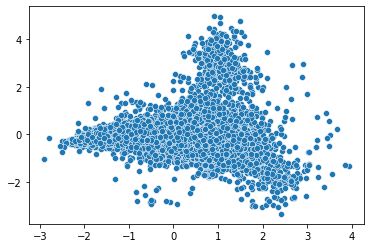

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

<a id="5"></a>
## Making Recommendations

In [ ]:
# Creating dataset for making recommendations for the first user
book_data = np.array(list(set(dataset.book_id)))
book_data[:5]

array([1, 2, 3, 4, 5])

In [ ]:
user = np.array([1 for i in range(len(book_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [ ]:
predictions = model.predict([user, book_data])

predictions = np.array([a[0] for a in predictions])

recommended_book_ids = (-predictions).argsort()[:5]

recommended_book_ids

array([8945, 7638, 7660, 5274, 8881])

In [ ]:
# print predicted scores
predictions[recommended_book_ids]

array([4.240443 , 4.1617727, 3.8892438, 3.78575  , 3.6717296],
      dtype=float32)

In [ ]:
books = pd.read_csv('../input/books.csv')
books.head()

In [ ]:
books[books['id'].isin(recommended_book_ids)]